**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

**Ingest data**

In [2]:
file_path = "H1/channel_7.csv"
df = pd.read_csv(file_path, index_col=0, parse_dates=True)

In [3]:
# Retrieve filename for graphs
base_name = os.path.basename(file_path)
component, _ = os.path.splitext(base_name)

**Select inspection window**

In [4]:
df.head()

,Watts,kW,Elapsed Time,sec/hour,kWh
DateTime,,,,,
2013-04-12 00:00:00,125,0.125,899,0.249722,0.000250
2013-04-12 00:15:00,121,0.121,900,0.250000,0.000242
2013-04-12 00:30:00,119,0.119,898,0.249444,0.000241
2013-04-12 00:45:00,122,0.122,899,0.249722,0.000244
2013-04-12 01:00:00,125,0.125,902,0.250556,0.000251


In [5]:
start_date = '2014-12-10'
end_date = '2014-12-11'
filtered_df = df[start_date:end_date]

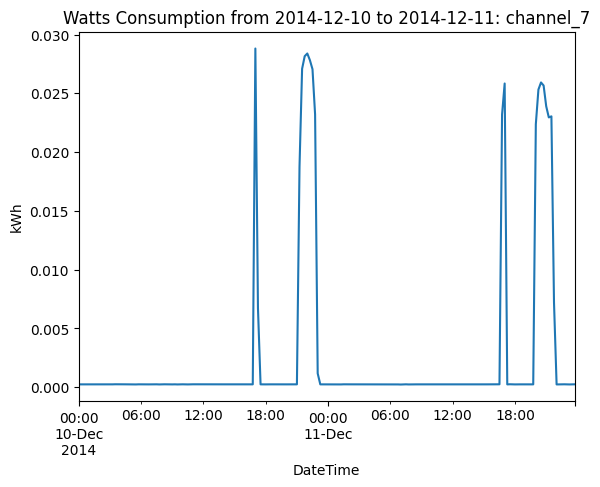

In [6]:
filtered_df['kWh'].plot()
plt.title(f'Watts Consumption from {start_date} to {end_date}: {component}')
plt.ylabel('kWh')
plt.xlabel('DateTime')
# Set the y-axis limits

plt.show()

In [7]:
total_kWh = filtered_df['kWh'].sum()

# Print the sum
print(f'kWh Consumption from {start_date} to {end_date}: ', total_kWh)

kWh Consumption from 2014-12-10 to 2014-12-11:  0.4848547222222134


In [8]:
df['Time'] = df.index.time
watt_avg = df.groupby(df.index.time)['kWh'].mean()

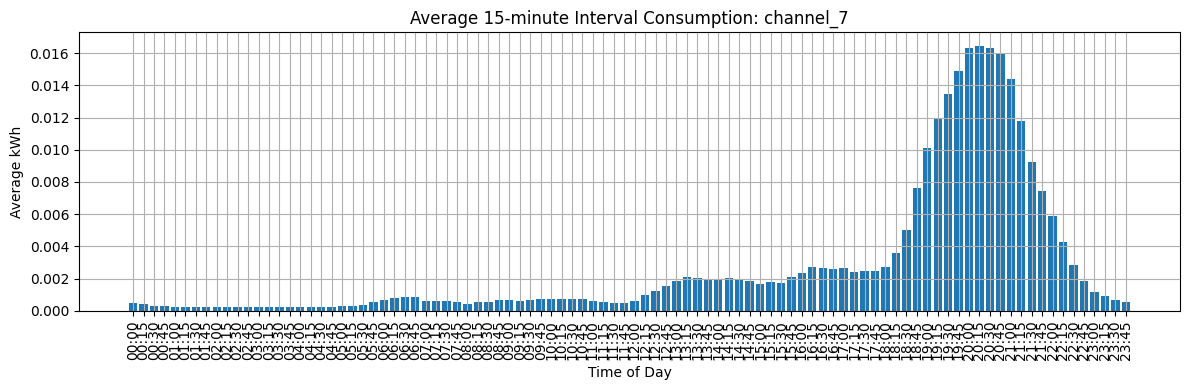

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust the size as necessary
ax.bar(range(len(watt_avg)), watt_avg.values, width=0.8, align='center')

# Set the x-ticks to correspond to each 15-minute interval and rotate them for better readability
ax.set_xticks(range(len(watt_avg)))
ax.set_xticklabels([t.strftime('%H:%M') for t in watt_avg.index], rotation=90)

# Add labels and title
ax.set_xlabel('Time of Day')
ax.set_ylabel('Average kWh')
ax.set_title(f'Average 15-minute Interval Consumption: {component}')

# Show grid for better readability
ax.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the padding to fit everything nicely
plt.show()

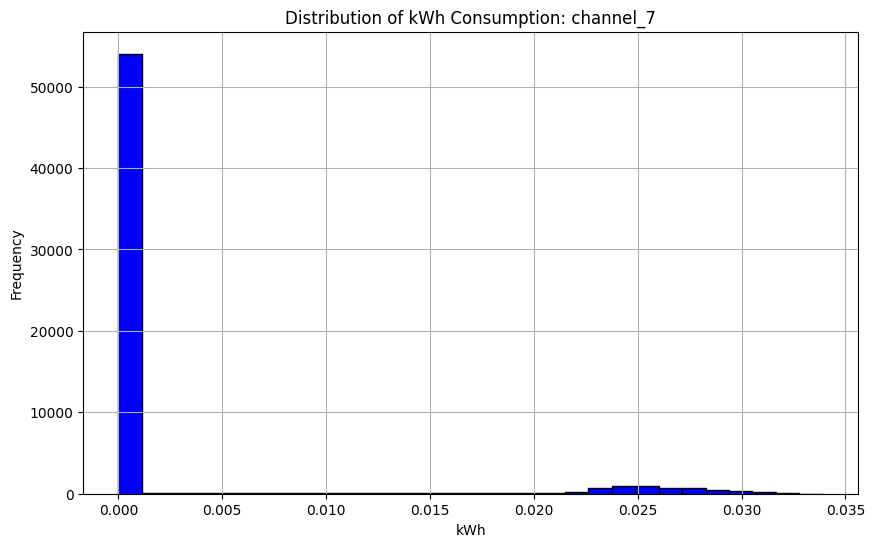

In [10]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['kWh'], bins=30, color='blue', edgecolor='black')  # You can adjust the number of bins

# Add labels and title
plt.xlabel('kWh')
plt.ylabel('Frequency')
plt.title(f'Distribution of kWh Consumption: {component}')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()

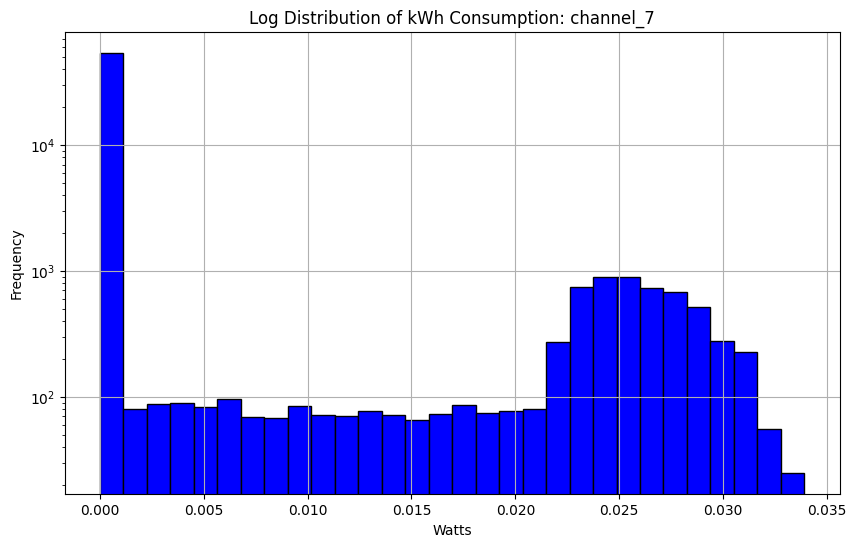

In [11]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['kWh'], bins=30, color='blue', edgecolor='black', log=True)  # You can adjust the number of bins

# Add labels and title
plt.xlabel('Watts')
plt.ylabel('Frequency')
plt.title(f'Log Distribution of kWh Consumption: {component}')

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.show()